<a href="https://colab.research.google.com/github/ahcamachod/2145-data-science-probando-relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Science: probando relaciones con regresión lineal**

##Base de datos
Utilizamos como inspiración la famosa base de datos House Price de Kaggle. Hicimos algunas transformaciones en la base original para garantizar un mejor aprendizaje de las técnicas presentadas en este curso.

Consulta a continuación los campos disponibles para análisis:

- **area_primer_piso:** Se refiere al área del primer piso de la propiedad, medida en metros cuadrados.
- **existe_segundo_piso:** Esta variable es binaria, indicando si la propiedad tiene o no un segundo piso. Puede ser representada como 1 para "sí" y 0 para "no".
- **area_segundo_piso:** Si la propiedad tiene un segundo piso, esta variable representa el área total del segundo piso, medida en metros cuadrados.
- **cantidad_baños:** Indica el número total de baños en la propiedad.
- **capacidad_coches_garaje:** Esta variable indica la capacidad del garaje de la propiedad, es decir, el número máximo de coches que pueden estacionarse en el garaje.
- **calidad_de_la_cocina_Excelente:** Esta es una variable categórica que evalúa la calidad de la cocina en la propiedad. En este caso, se asume que si la cocina es considerada "Excelente" se representa por 1, y de lo contrario, por 0.
- **precio_de_venta:** Este es el precio de venta de la propiedad en reales. Es la variable objetivo que se intenta predecir utilizando los otros atributos de la propiedad.

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [1]:
#Leyendo los datos
import pandas as pd

datos = pd.read_csv('/content/precios_casas.csv')
datos.head(2)

Id  area_primer_piso  tiene_segundo_piso  area_segundo_piso  \
0   1           79.5224                   1            79.3366   
1   2          117.2398                   0             0.0000   

   cantidad_banos  capacidad_carros_garage  calidad_de_cocina_excelente  \
0               2                      548                            0   
1               2                      460                            0   

   precio_de_venta  
0        1027905.0  
1         894795.0

In [2]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [3]:
datos = datos.drop(columns = 'Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [4]:
# Correlación
corr = datos.corr()

In [5]:
corr['precio_de_venta']

area_primer_piso               0.616557
tiene_segundo_piso             0.138541
area_segundo_piso              0.305311
cantidad_banos                 0.563132
capacidad_carros_garage        0.640214
calidad_de_cocina_excelente    0.496223
precio_de_venta                1.000000
Name: precio_de_venta, dtype: float64

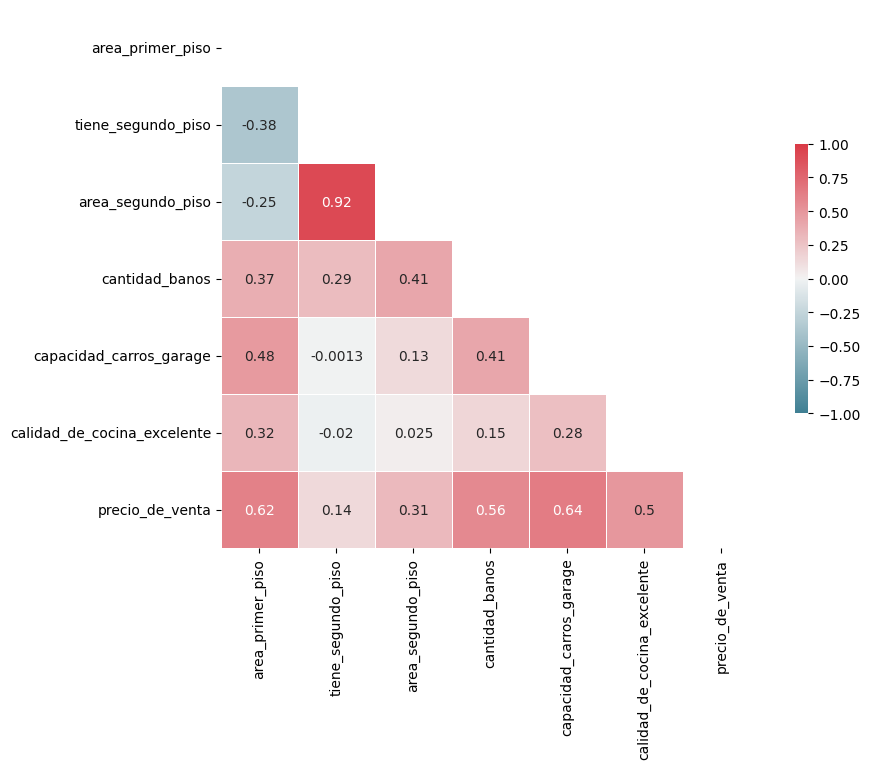

In [6]:
# Actividad
# Cuáles factores están más correlacionados?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(9, 7))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

**Presta atención a los puntos a continuación para un análisis completo:**

- Intensidad: se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.

- Dirección: se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

Los coeficientes más altos positivos son:
*   0.92: Tiene segundo piso y área de segundo piso
*   0.64: Capacidad de carros en garaje y precio de venta
*   0.62: Área del primer piso y precio de venta
*   0.56: Cantidad de baños y precio de venta
*   0.5: Calidad de cocina excelente y precio de venta
En general, a medida que uno aumenta, el otro también tiende a aumentar (dirección) de manera moderada, fuerte y proporcional.

Los coeficientes positivos no tan fuertes son:
*   0.48: Capacidad de carros en garaje y área en primer piso
*   0.41: Cantidad de baños y área en segundo piso
*   0.41: Capacidad de carros en garaje y cantidad de baños
*   0.37: Cantidad de baños y área de primer piso
*   0.32: Calidad de cocina excelente y área en primer piso.
*   0.31: Área en segundo piso y precio de venta

En general, a medida que uno aumenta, el otro también tiende a aumentar (dirección) de manera moderada y proporcional. Los siguientes siguen del mismo modo esta tendencia, pero de una manera más leve.
*   0.29: Cantidad de baños y tiene un segundo piso
*   0.28: Calidad de cocina excelente y capacidad de carros en garaje
*   0.15: Calidad de cocina excelente y cantidad de baños
*   0.13: Capacidad de carros en garaje y área en segundo piso

La correlación entre calidad de cocina excelente y área de segundo piso es muy baja que puede considerarse nula, aunque tiende a ser positiva (0.025).

No hay tendencias fuertes negativas, solo moderadas y leves, las moderadas son:
*   -0.38: Área del primer piso y tiene segundo piso
*   -0.25: Área de segundo piso y área del primer piso
En general, a medida que uno aumenta, el otro tiende a bajar (dirección) de manera moderada y proporcional. Los siguientes siguen del mismo modo esta tendencia, pero de una manera más leve poco significativa.
*   -0.0013: Capacidad de carros en garaje y tiene segundo piso
*   -0.02: Calidad de cocina excelente y tiene segundo piso.



## Relacionando variables

In [7]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

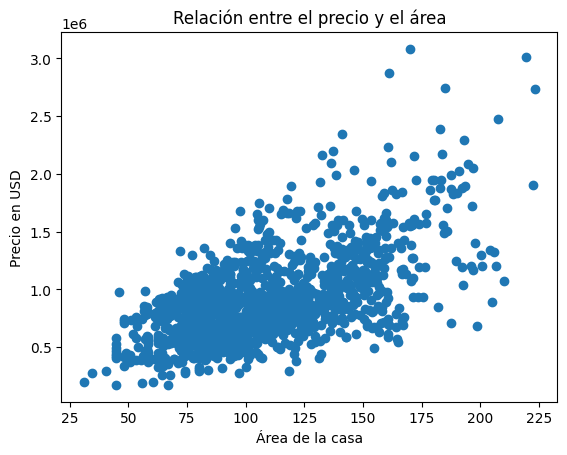

In [8]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.title('Relación entre el precio y el área')
plt.xlabel('Área de la casa')
plt.ylabel('Precio en USD')
plt.show()

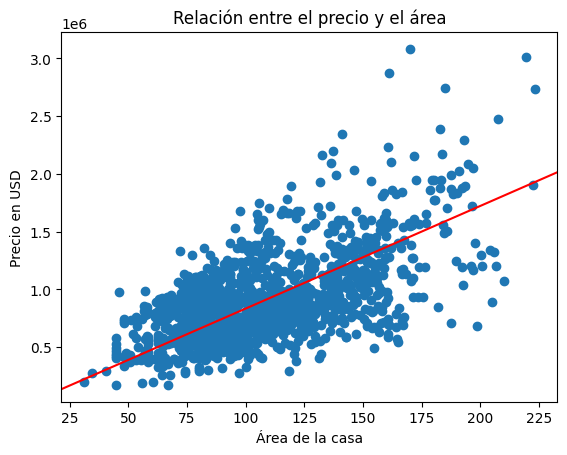

In [9]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40,300000), xy2=(175,1500000), color='red')
plt.title('Relación entre el precio y el área')
plt.xlabel('Área de la casa')
plt.ylabel('Precio en USD')
plt.show()

## Mejor recta

In [10]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos,x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

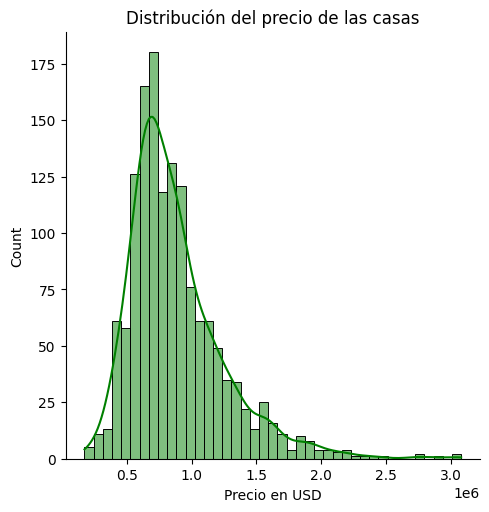

In [11]:
#Quién es nuestra variable de respuesta?
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de las casas')
plt.xlabel('Precio en USD')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [12]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns = 'precio_de_venta') # se usa el drop porque son todas las variables menos el precio de venta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230) #garantizar la reproductibilidad de la segregación de datos


In [13]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [14]:
# import ols
from statsmodels.formula.api import ols

In [15]:
# ajustando el primer modelo
modelo_0= ols('precio_de_venta ~ area_primer_piso', data=df_train).fit() #fit es ajusta esta combinacion para mi modelo

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [16]:
# visualizando los parámetros
modelo_0.params

Intercept           152909.288334
area_primer_piso      6793.641641
dtype: float64

In [17]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        02:01:02   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


##Estimación de la regresión lineal simple

La regresión lineal fue la metodología que ajustó la mejor línea que representa linealmente la interacción entre X e Y; en nuestro caso, el tamaño del área del primer piso y el precio de venta de la casa.

Vale la pena repasar cada componente de la regresión lineal:

**Función**

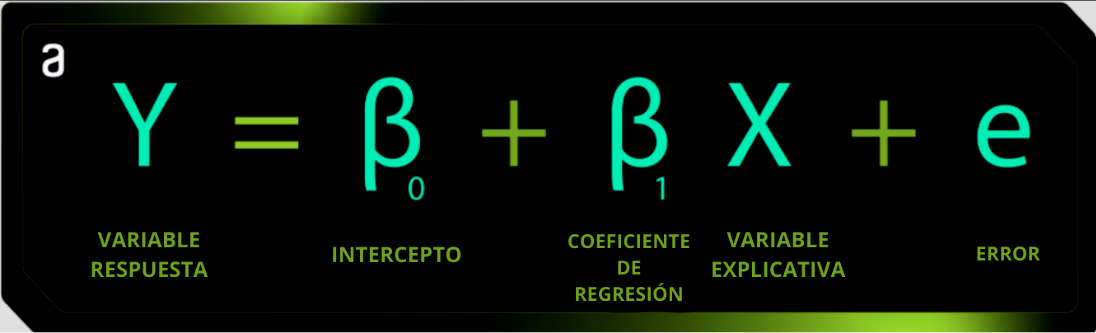

- **Variable Respuesta (Y):** También llamada variable dependiente, es aquella que estamos tratando de predecir.

- **Intercepto (β₀):** El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.

- **Variable Explicativa (X):** También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.

- **Coeficientes de Regresión (β₁):** Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.

- **Error Residual (e):** Diferencia entre los valores reales y previstos de la variable respuesta.


**Coeficientes**

La relación lineal entre las variables X e Y se representa gráficamente por una línea. Este proceso de encontrar la línea ideal implica minimizar la distancia entre los puntos reales y la propia línea.

El ajuste de la línea de regresión lineal se simplifica mediante el método de los mínimos cuadrados. Este método tiene como objetivo encontrar la línea que mejor se ajusta a los datos observados, minimizando la suma de los cuadrados de las diferencias entre los valores reales y los valores previstos por la línea y calculando los coeficientes del modelo.

## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

**Interpretando el R²**

Varía de 0 a 1, un valor cercano a 1 indica que el modelo se ajusta bien a los datos, explicando la mayor parte de la variación en la variable dependiente/respuesta. Por otro lado, un valor cercano a 0 indica que el modelo no puede explicar mucha variación en la variable dependiente/respuesta.

**Usando en la prueba**

Además, el R² puede ser utilizado para comparar el rendimiento del modelo en diferentes conjuntos de datos, como entrenamiento y prueba. Esto ayuda a identificar problemas de sobreajuste (overfitting) o subajuste (underfitting). Idealmente, deseamos que el R² sea consistente entre los conjuntos de entrenamiento y prueba, indicando una buena capacidad de generalización del modelo para nuevos datos.

**Fórmula**

Una de las fórmulas del R² puede ser representada por la razón entre la variación explicada y la variación total. Por eso decimos que cuanto más cerca de 1, mejor es la adecuación del modelo, ya que la variación explicada será más cercana a la variación total en esta razón.

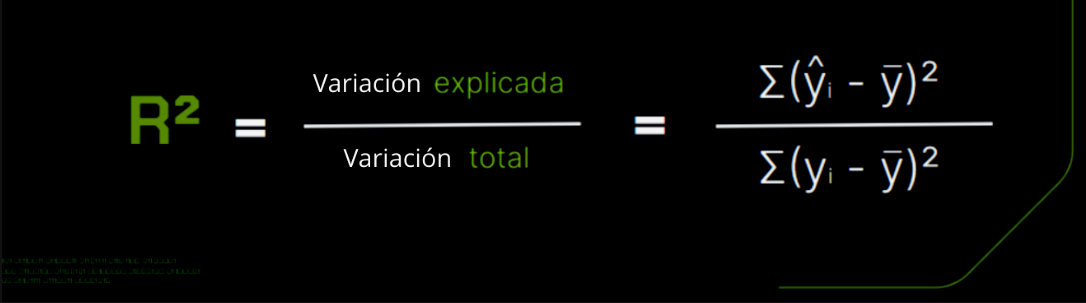

In [18]:
# observando el R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendiendo el resíduo

In [19]:
# Quiénes son los residuos?
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

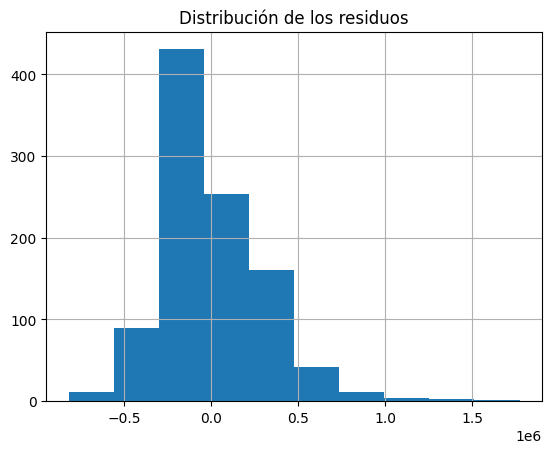

In [20]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [21]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [22]:
# importando el r2_score
from sklearn.metrics import r2_score


In [23]:
# mostrando el resultado de r²
print(f'El coeficinete de determinación R2 para el modelo con los datos de prueba es de: {round(r2_score(y_test,y_predict),2)}')

El coeficinete de determinación R2 para el modelo con los datos de prueba es de: 0.39


##Ejercicio: Analizando la variable respuesta


Durante esta clase, nos enfocamos en analizar el comportamiento de la variable respuesta, es decir, comprender el precio de venta de la casa.

Para esto, hicimos un histograma como recurso visual para facilitar este análisis.

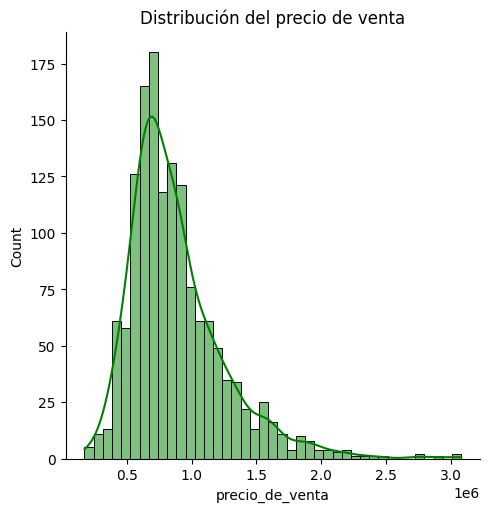

In [24]:
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

En esta actividad, aplica la función displot de la biblioteca Seaborn (sns) y explora los aspectos de la visualización de datos. Para ello, utiliza tus conocimientos adquiridos hasta el momento y desarrolla tus habilidades aún más.

Esta función se usa para crear un gráfico de distribución. El parámetro kde=True indica que queremos trazar la densidad de kernel estimada sobre el histograma. A través de este ejercicio práctico, tendrás la posibilidad de visualizar la forma de la distribución con más suavidad.

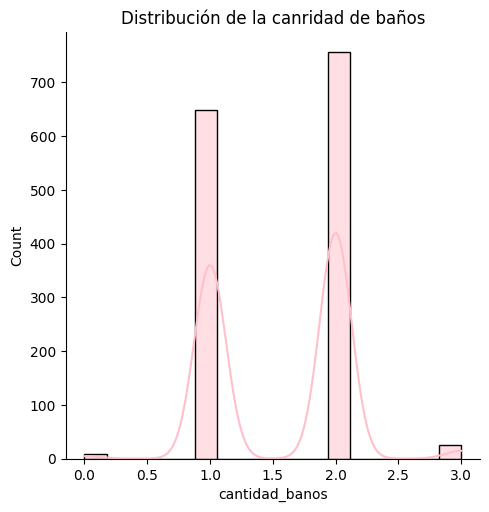

In [25]:
sns.displot(datos['cantidad_banos'], kde=True, color='pink')
plt.title('Distribución de la canridad de baños')
plt.show()

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

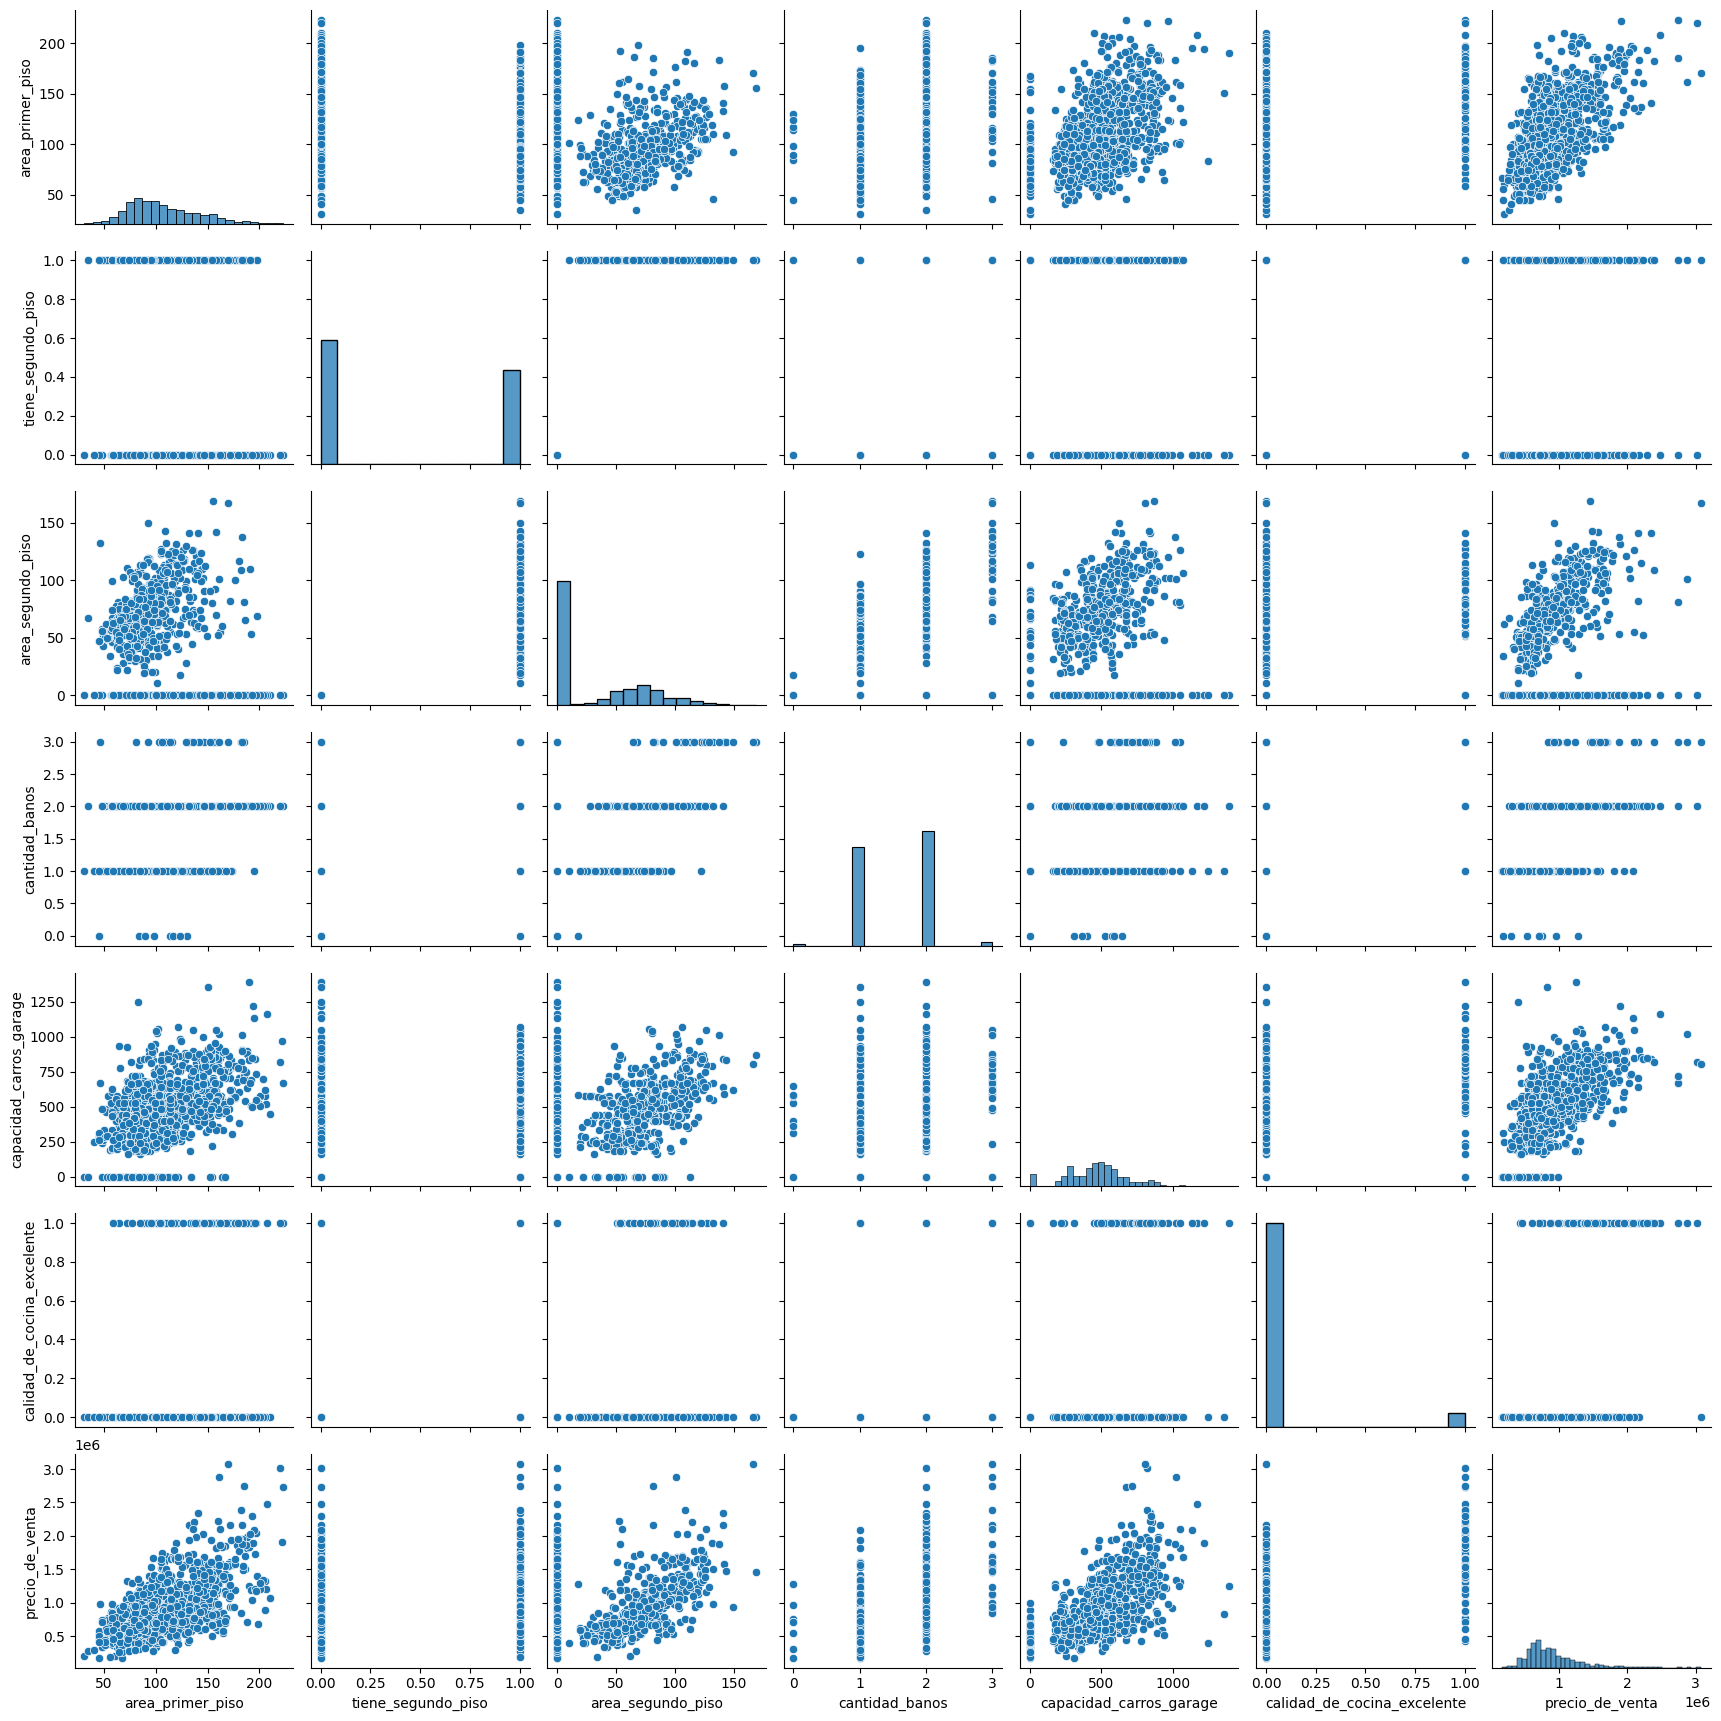

In [26]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)
plt.show()

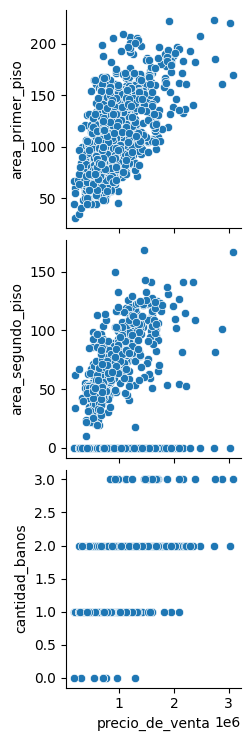

In [27]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'], x_vars= 'precio_de_venta')
plt.show()

## Añadiendo factores al modelo

In [28]:
# importando la api de statsmodels
import statsmodels.api as sm

In [29]:
# Añadiendo una constante
X_train = sm.add_constant(X_train)
X_train.head(2)

const  area_primer_piso  tiene_segundo_piso  area_segundo_piso  \
1303    1.0           65.7732                   0             0.0000   
326     1.0           55.3684                   1            55.3684   

      cantidad_banos  capacidad_carros_garage  calidad_de_cocina_excelente  
1303               1                        0                            0  
326                1                      189                            0

In [30]:
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [31]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [32]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [33]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']]).fit()

In [34]:
# Resumen del modelos
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]
for i, j in enumerate(modelos):
  print(f'******************************************************************************************\n************************* EL MODELO {i} TIENE EL SIGUIENTE RESUMEN **************************\n****************************************************************************************** ')
  print(j.summary(),'\n\n')

******************************************************************************************
************************* EL MODELO 0 TIENE EL SIGUIENTE RESUMEN **************************
****************************************************************************************** 
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        02:01:11   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Typ

In [35]:
for i, j in enumerate(modelos):
  print(f'El coeficinete de determinación R2 del modelo {i} es: {j.rsquared.round(2)}')

El coeficinete de determinación R2 del modelo 0 es: 0.38
El coeficinete de determinación R2 del modelo 1 es: 0.74
El coeficinete de determinación R2 del modelo 2 es: 0.71
El coeficinete de determinación R2 del modelo 3 es: 0.65


## Comparando los modelos
Cuál es el modelo?


In [36]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

const                         -129979.678094
area_primer_piso                 6119.653184
tiene_segundo_piso             221306.959705
cantidad_banos                 149036.289458
calidad_de_cocina_excelente    444391.228573
dtype: float64

###Actividad
Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset de hoteis.cvs

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

análisis inicial con el PairPlot de Seaborn;
construir modelos de regresión lineal; y
realizar la comparación de estos modelos.
Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [37]:
df = pd.read_csv('/content/hoteis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [38]:
df.head()

Estrelas  ProximidadeTurismo  Capacidade       Preco
0         5            9.301565           3  506.275452
1         1            1.785891           1  246.363458
2         4           15.504293           3  325.873550
3         4            4.173188           3  521.343284
4         4            9.443685           1  252.587087

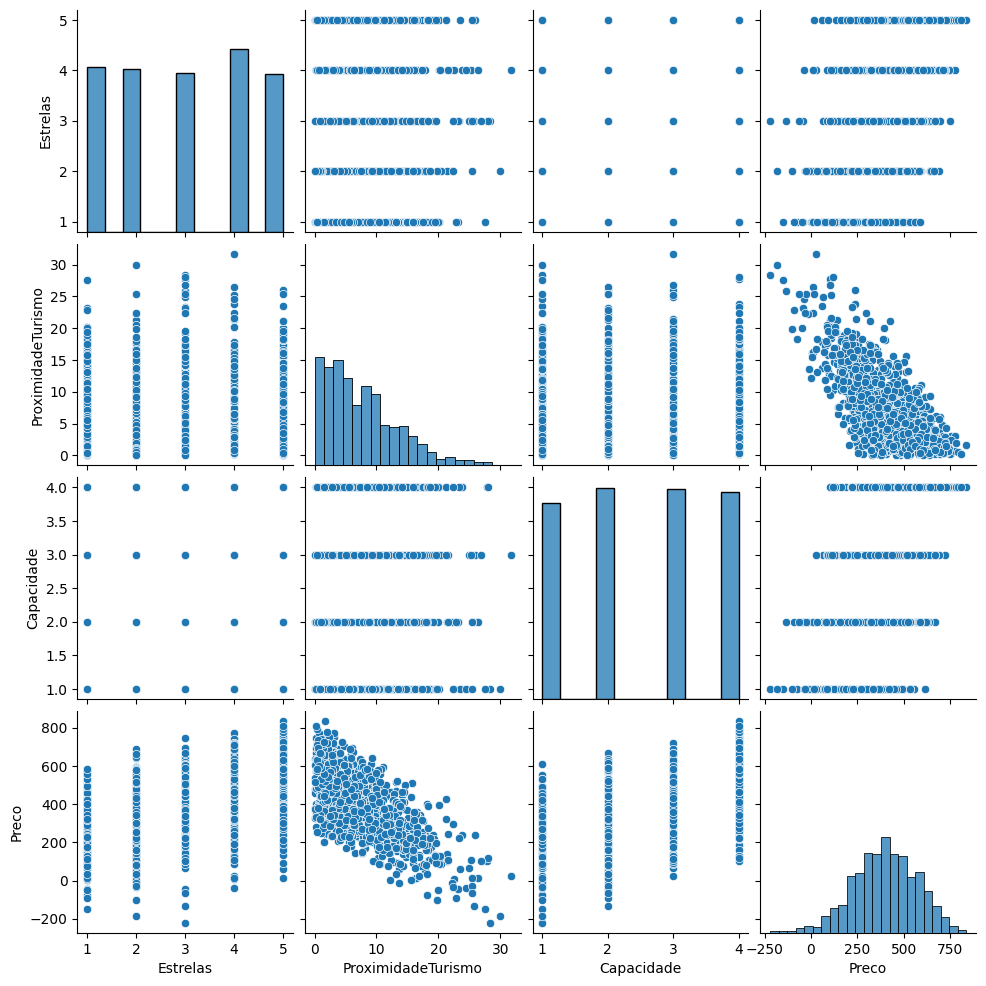

In [39]:
sns.pairplot(df)
plt.show()


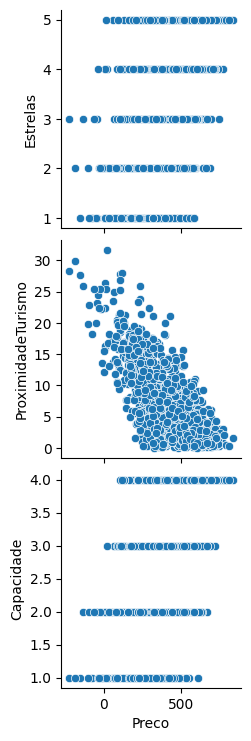

In [40]:
sns.pairplot(df, y_vars=['Estrelas','ProximidadeTurismo','Capacidade'], x_vars= 'Preco')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

y = df['Preco']
X = df.drop(columns = 'Preco') # se usa el drop porque son todas las variables menos el precio de venta

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=230) #garantizar la reproductibilidad de la segregación de datos
X_train2 = sm.add_constant(X_train2)
X_train2.head(2)

const  Estrelas  ProximidadeTurismo  Capacidade
740    1.0         5            9.724029           3
182    1.0         4           14.893560           4

In [42]:
X_train2.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [43]:
modelo0 = sm.OLS(y_train2, X_train2[['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade']]).fit()

modelo1 = sm.OLS(y_train2, X_train2[['const', 'Estrelas', 'ProximidadeTurismo']]).fit()
modelo2 = sm.OLS(y_train2, X_train2[['const', 'Estrelas', 'Capacidade']]).fit()
modelo3 = sm.OLS(y_train2, X_train2[['const', 'ProximidadeTurismo', 'Capacidade']]).fit()

modelo4 = sm.OLS(y_train2, X_train2[['const', 'ProximidadeTurismo']]).fit()
modelo5 = sm.OLS(y_train2, X_train2[['const', 'Estrelas']]).fit()
modelo6 = sm.OLS(y_train2, X_train2[['const', 'Capacidade']]).fit()

In [44]:
# Resumen del modelos
Modelos = [modelo0, modelo1, modelo2, modelo3, modelo4, modelo5, modelo6]
for i, j in enumerate(Modelos):
  print(f'******************************************************************************************\n************************* EL MODELO {i} TIENE EL SIGUIENTE RESUMEN **************************\n****************************************************************************************** ')
  print(j.summary(),'\n\n')


******************************************************************************************
************************* EL MODELO 0 TIENE EL SIGUIENTE RESUMEN **************************
****************************************************************************************** 
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2828.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:01:14   Log-Likelihood:                -3689.2
No. Observations:                 700   AIC:                             7386.
Df Residuals:                     696   BIC:                             7405.
Df Model:                           3                                         
Covariance Typ

In [45]:
for i, j in enumerate(Modelos):
  print(f'El coeficinete de determinación R2 del modelo {i} es: {j.rsquared.round(2)}')


El coeficinete de determinación R2 del modelo 0 es: 0.92
El coeficinete de determinación R2 del modelo 1 es: 0.64
El coeficinete de determinación R2 del modelo 2 es: 0.45
El coeficinete de determinación R2 del modelo 3 es: 0.75
El coeficinete de determinación R2 del modelo 4 es: 0.49
El coeficinete de determinación R2 del modelo 5 es: 0.15
El coeficinete de determinación R2 del modelo 6 es: 0.28


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [96]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head(2)

const  area_primer_piso  tiene_segundo_piso  area_segundo_piso  \
997    1.0           94.9438                   0             0.0000   
805    1.0           74.1342                   1            78.2218   

     cantidad_banos  capacidad_carros_garage  calidad_de_cocina_excelente  
997               1                      280                            0  
805               2                      595                            0

In [47]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(X_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']])

In [48]:
# Cuál es el r² de la previsión?
print(f'El coeficiente de determinación R2 de la base de prevision es: {modelo_3.rsquared.round(2)}')

El coeficiente de determinación R2 de la base de prevision es: 0.65


In [49]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente de determinación R2 con respecto a la base de prevision es: {round(r2_score(y_test,prevision_3),2)}')

El coeficiente de determinación R2 con respecto a la base de prevision es: 0.64


Si son parecidos significa que si puede generalizar con datos nuevos (si sirve para predecir datos futuros)


El coeficiente de determinación (R²) es una métrica fundamental en modelos de regresión, ya que indica la proporción de la varianza en la variable de respuesta que es explicada por las variables explicativas.

Es importante comparar el R² calculado con los datos de entrenamiento y también con los datos de prueba en modelos de regresión porque:
Para determinar si el modelo está sobreajustado a los datos de entrenamiento (overfitting), perdiendo la capacidad de generalización.

## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [50]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [51]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [120],
    'tiene_segundo_piso': [1],
    'cantidad_banos': [2],
    'calidad_de_cocina_excelente': [0],
})

In [52]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

0    968146.29
dtype: float64

In [53]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

0    1123758.24
dtype: float64

In [54]:
modelo_3.params

const                         -129979.678094
area_primer_piso                 6119.653184
tiene_segundo_piso             221306.959705
cantidad_banos                 149036.289458
calidad_de_cocina_excelente    444391.228573
dtype: float64

## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [55]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('/content/nuevas_casas.csv', sep=';')
nuevas_casas.head(2)

Casa  area_primer_piso  tiene_segundo_piso  cantidad_banos  \
0     1               150                   1               2   
1     2               180                   0               3   

   calidad_de_cocina_excelente  
0                            1  
1                            1

In [56]:
nuevas_casas.drop(columns='Casa', inplace=True)

In [57]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)

In [58]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()
# precio_casas = pd.DataFrame()
nuevas_casas['Precio de Venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

const  area_primer_piso  tiene_segundo_piso  cantidad_banos  \
0    1.0               150                   1               2   
1    1.0               180                   0               3   
2    1.0               120                   1               2   
3    1.0               200                   1               3   
4    1.0               160                   0               2   
5    1.0               140                   1               2   
6    1.0               170                   0               3   
7    1.0               190                   1               2   
8    1.0               130                   0               2   
9    1.0               180                   1               3   

   calidad_de_cocina_excelente  Precio de Venta  
0                            1       1751739.07  
1                            1       1863057.99  
2                            1       1568149.47  
3                            1       2206758.02  
4                            1       1591628.64  
5                            0       1246151.31  
6                            0       1357470.23  
7                            0       1552133.97  
8                            0        963647.81  
9                            0       1639973.72

### Ejercicio: Estimando el valor de una casas
Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

- 1 baño
- Área 98m²
- No tiene segundo piso
- Calidad de la cocina excelente


In [59]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [98],
    'tiene_segundo_piso': [0],
    'cantidad_banos': [1],
    'calidad_de_cocina_excelente': [1],
})

In [60]:
modelo_0.predict(nuevo_inmueble['area_primer_piso'])

0    818686.169194
dtype: float64

In [61]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

0    1063173.85
dtype: float64

## Guardando el modelo en un archivo

Al desarrollar modelos de regresión con `Statsmodels`, es común querer guardar estos modelos para uso futuro, ya sea para implementación en producción, compartir con otros miembros del equipo o simplemente para respaldo. Una manera conveniente de hacer esto en Python es usando la biblioteca `pickle`, que permite serializar objetos de Python en archivos y deserializarlos de vuelta a objetos de Python. Esta biblioteca no necesita ser instalada, ya que viene por defecto en Python.

Vamos a explorar cómo guardar un modelo de regresión lineal de `Statsmodels` con la biblioteca `pickle` y luego cómo leer el archivo.



 **Cómo guardar el Modelo con Pickle**

Después de entrenar el modelo, podemos guardarlo en un archivo usando la biblioteca pickle. Para ello, es necesario importar la biblioteca y luego podemos usar la función `pickle.dump()`, indicando el modelo y el archivo como parámetros.

In [62]:
modelo = modelo_3

In [63]:
import pickle

# Nombre del archivo donde se guardará el modelo
nombre_archivo = 'modelo_regresion_lineal.pkl'

# Guardar el modelo en un archivo usando pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo, archivo)

##Cargar el Modelo de vuelta con Pickle
Después de guardar el modelo, podemos cargarlo de vuelta para uso posterior. Para hacer esto, simplemente usamos el método `pickle.load()` utilizando el archivo como parámetro de la función.

In [64]:
# Cargar el modelo de vuelta del archivo
with open(nombre_archivo, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

A partir de la lectura del archivo, es posible utilizar el modelo para hacer predicciones y verificar métricas de la misma manera que usamos el modelo original.

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [65]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [66]:
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']

explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']

explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']

In [67]:
# VIF 1
vif_1 =pd.DataFrame()
vif_1['variables'] = explicativas_1
vif_1['vif'] = [vif(X_train[explicativas_1],i) for i in range(len(explicativas_1))]
vif_1

variables        vif
0                        const  20.230833
1             area_primer_piso   2.193680
2           tiene_segundo_piso   7.455059
3            area_segundo_piso   7.589396
4               cantidad_banos   1.720795
5      capacidad_carros_garage   1.570078
6  calidad_de_cocina_excelente   1.182606

Si las variables son mayor a 5, significa que tiene multicolinealidad

In [68]:
# VIF 3
vif_3 =pd.DataFrame()
vif_3['variables'] = explicativas_3
vif_3['vif'] = [vif(X_train[explicativas_3],i) for i in range(len(explicativas_3))]
vif_3

variables        vif
0                        const  18.773457
1             area_primer_piso   1.919046
2           tiene_segundo_piso   1.644067
3               cantidad_banos   1.539255
4  calidad_de_cocina_excelente   1.151795

## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [69]:
#Previsión de los valores de entrenamiento X_train[expectativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])

In [70]:
# Generando un scatter plot entre y_previsto e y_train

fig = px.scatter(x=y_previsto_train, y=y_train, title='Valor Previsto vs Real',
                 labels = {'x': 'Valor Previsto', 'y': 'Valor Real'})
fig.show()

In [72]:
# Residuos
residuos= modelo_3.resid

fig = px.scatter(x=y_previsto_train, y=residuos, title='Valor Previsto vs Residuos',
                 labels = {'x': 'Valor Previsto', 'y': 'Valor Residuos'})
fig.show()

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

###Ejercicio

En esta actividad, vamos a aplicar los conceptos de multicolinealidad y homocedasticidad en un contexto diferente: el sector de energía. Utilizaremos el dataset "usina.csv" de una planta de energía para explorar cómo estos conceptos pueden afectar nuestros modelos de regresión. ¡Vamos!

Tu tarea implica llevar a cabo las siguientes etapas:

- **Primera etapa:** Verifica la multicolinealidad utilizando el concepto de VIF. Si hay indicios de multicolinealidad entre las variables, intenta pensar en qué medidas se pueden tomar. Para ello, deberás construir un modelo de regresión lineal asumiendo que la columna PE es la variable y.

- **Segunda etapa:** Realiza un análisis de residuos e identifica si hay o no heterocedasticidad en los datos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [73]:
df_usina = pd.read_csv('/content/usina.csv')
df_usina.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

In [99]:
from sklearn.model_selection import train_test_split

y = df_usina['PE']
X = df_usina.drop(columns = 'PE') # se usa el drop porque son todas las variables menos el precio de venta


X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=230) #garantizar la reproductibilidad de la segregación de datos
X_train3 = sm.add_constant(X_train3)

df_train3 = pd.DataFrame(X_train3)
df_train3['PE'] = y_train3

modelo_00 = sm.OLS(y_train3, X_train3[['const', 'AT', 'V', 'AP','RH']]).fit()

modelo_01 = sm.OLS(y_train3, X_train3[['const', 'AT', 'V', 'AP']]).fit()
modelo_02 = sm.OLS(y_train3, X_train3[['const', 'AT', 'V','RH']]).fit()
modelo_03 = sm.OLS(y_train3, X_train3[['const', 'AT', 'AP','RH']]).fit()
modelo_04 = sm.OLS(y_train3, X_train3[['const', 'V', 'AP','RH']]).fit()

modelo_05 = sm.OLS(y_train3, X_train3[['const', 'AT', 'V']]).fit()
modelo_06 = sm.OLS(y_train3, X_train3[['const', 'AT', 'AP']]).fit()
modelo_07 = sm.OLS(y_train3, X_train3[['const', 'AT', 'RH']]).fit()

modelo_08 = sm.OLS(y_train3, X_train3[['const', 'V', 'AP']]).fit()
modelo_09 = sm.OLS(y_train3, X_train3[['const', 'V', 'RH']]).fit()

modelo_10 = sm.OLS(y_train3, X_train3[['const', 'AP','RH']]).fit()

modelo_11 = sm.OLS(y_train3, X_train3[['const', 'AT']]).fit()
modelo_12 = sm.OLS(y_train3, X_train3[['const', 'V']]).fit()
modelo_13 = sm.OLS(y_train3, X_train3[['const', 'AP']]).fit()
modelo_14 = sm.OLS(y_train3, X_train3[['const', 'RH']]).fit()


In [92]:
Modelos = [modelo_00, modelo_01, modelo_02, modelo_03, modelo_04, modelo_05, modelo_06, modelo_07, modelo_08, modelo_09, modelo_10, modelo_11, modelo_12, modelo_13, modelo_14]
for i, j in enumerate(Modelos):
  print(f'******************************************************************************************\n************************* EL MODELO {i} TIENE EL SIGUIENTE RESUMEN **************************\n****************************************************************************************** ')
  print(j.summary(),'\n\n')


******************************************************************************************
************************* EL MODELO 0 TIENE EL SIGUIENTE RESUMEN **************************
****************************************************************************************** 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:39:45   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Typ

In [94]:
for i, j in enumerate(Modelos):
  print(f'El coeficinete de determinación R2 del modelo {i} es: {j.rsquared.round(4)}')

El coeficinete de determinación R2 del modelo 0 es: 0.9291
El coeficinete de determinación R2 del modelo 1 es: 0.919
El coeficinete de determinación R2 del modelo 2 es: 0.9287
El coeficinete de determinación R2 del modelo 3 es: 0.9209
El coeficinete de determinación R2 del modelo 4 es: 0.8077
El coeficinete de determinación R2 del modelo 5 es: 0.9166
El coeficinete de determinación R2 del modelo 6 es: 0.9011
El coeficinete de determinación R2 del modelo 7 es: 0.9209
El coeficinete de determinación R2 del modelo 8 es: 0.7896
El coeficinete de determinación R2 del modelo 9 es: 0.775
El coeficinete de determinación R2 del modelo 10 es: 0.391
El coeficinete de determinación R2 del modelo 11 es: 0.899
El coeficinete de determinación R2 del modelo 12 es: 0.7584
El coeficinete de determinación R2 del modelo 13 es: 0.277
El coeficinete de determinación R2 del modelo 14 es: 0.1514


In [100]:
# Añadiendo una constante en X_test
X_test3 = sm.add_constant(X_test3)

In [101]:
prevision_07 = modelo_07.predict(X_test3[['const', 'AT', 'RH']])

In [102]:
# Cuál es el r² de la previsión?
print(f'El coeficiente de determinación R2 de la base de prevision es: {modelo_07.rsquared.round(2)}')


El coeficiente de determinación R2 de la base de prevision es: 0.92


In [103]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente de determinación R2 con respecto a la base de prevision es: {round(r2_score(y_test3,prevision_07),2)}')

El coeficiente de determinación R2 con respecto a la base de prevision es: 0.92


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
explicativas_01 = ['const', 'AT', 'V', 'AP']
explicativas_07 = ['const', 'AT', 'RH']


In [105]:
# VIF 1
vif_01 =pd.DataFrame()
vif_01['variables'] = explicativas_01
vif_01['vif'] = [vif(X_train3[explicativas_01],i) for i in range(len(explicativas_01))]
vif_01


variables           vif
0     const  40540.245247
1        AT      3.880623
2         V      3.467119
3        AP      1.360520

In [106]:
# VIF 7
vif_07 =pd.DataFrame()
vif_07['variables'] = explicativas_07
vif_07['vif'] = [vif(X_train3[explicativas_07],i) for i in range(len(explicativas_07))]
vif_07


variables        vif
0     const  66.528033
1        AT   1.414577
2        RH   1.414577

In [107]:
y_previsto_train3 = modelo_07.predict(X_train3[explicativas_07])
fig = px.scatter(x=y_previsto_train3, y=y_train3, title='Valor Previsto vs Real',
                 labels = {'x': 'Valor Previsto', 'y': 'Valor Real'})
fig.show()


In [108]:
residuos3= modelo_07.resid

fig = px.scatter(x=y_previsto_train3, y=residuos3, title='Valor Previsto vs Residuos',
                 labels = {'x': 'Valor Previsto', 'y': 'Valor Residuos'})
fig.show()


#¿Qué es la Heterocedasticidad?

Significa que la regresión lineal no está funcionando bien

La heterocedasticidad es un término utilizado en estadística para describir una situación en la que la varianza de los errores (o residuos) de un modelo de regresión no es constante a lo largo del rango de valores previstos. En términos simples, si la dispersión de los residuos varía en diferentes niveles del predictor, estamos ante la heterocedasticidad. Esto es un problema porque la mayoría de los métodos de regresión lineal asumen homocedasticidad, es decir, que los residuos tienen varianza constante en todos los niveles de los predictores.



##¿Por qué es un Problema la Heterocedasticidad?
La presencia de heterocedasticidad puede llevar a estimaciones de coeficientes ineficientes y a pruebas de hipótesis inválidas, comprometiendo la confiabilidad de las inferencias estadísticas. Aunque no afecta la imparcialidad o la consistencia de los estimadores de mínimos cuadrados ordinarios, impacta en la eficiencia de estos estimadores, haciéndolos menos confiables.

**Identificando la Heterocedasticidad**

Uno de los métodos más comunes para detectar la heterocedasticidad es a través del análisis visual de los residuos. Después de ajustar un modelo de regresión lineal, podemos graficar los residuos en función de los valores previstos. Si los residuos se dispersan de manera uniforme, sin formar patrones o embudos, el modelo probablemente presenta homocedasticidad. Por otro lado, si la dispersión de los residuos aumenta o disminuye con los valores previstos, esto indica heterocedasticidad.

\\

**¿Cómo Evaluar la Heterocedasticidad?**

Además de un análisis visual de los residuos, existen varias pruebas estadísticas para evaluar formalmente la presencia de heterocedasticidad, como la prueba de White y la prueba de Breusch-Pagan. Estas pruebas ayudan a cuantificar si la varianza de los residuos está relacionada con los valores previstos, proporcionando una base más sólida para decidir si la heterocedasticidad es una preocupación significativa en el modelo.

\\

**Tratando la Heterocedasticidad**

Si identificamos heterocedasticidad, se pueden adoptar varias enfoques para abordar el problema, como la transformación de variables (por ejemplo, logarítmica o raíz cuadrada) o el uso de técnicas de regresión robustas, que son menos sensibles a la varianza de los residuos.

\\

**Conclusión**
Al comprender e identificar la heterocedasticidad, podemos tomar medidas apropiadas para garantizar que nuestros análisis de regresión lineal sean confiables y válidos. Este cuidado nos permite hacer inferencias más precisas y fundamentadas, esenciales para la toma de decisiones basadas en datos.